# Sales Prediction for BigMart

## Problem Description

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

This project is a regression problem i.e. we are predicting a continous value and will be solved via supervised learning because we already have past sales data.

## Exploring the dataset

| Variable                  | Description                                                                      |
|---------------------------|----------------------------------------------------------------------------------|
| Item_Identifier           | Unique Product ID                                                                |
| Item_Weight               | Weight of product                                                                |
| Item_Fat_Content          | Low in fat or not (Low Fat, Regular)                                             |
| Item_Visibility           | % of total display area allocated to the product                                 |
| Item_Type                 | Category for the product                                                         |
| Item_MRP                  | Maximum Retail price of the product                                              |
| Outlet_Identifier         | Unique Store ID                                                                  |
| Outlet_Establishment_Year | Year store was made                                                              |
| Outlet_Size               | Size of store (small, medium, high)                                              |
| Outlet_Location_Type      | Type of city (tier 1, tier 2, tier 3)                                            |
| Outlet_Type               | Supermarket or grocery                                                           |
| Item_Outlet_Sales         | Sale of product in the particular store. (Also what we are trying to predict!!!) |

## Getting Started

We use a virtual environment to do all our development in, this ensures that we don't import modules that accidentally conflict with other project work. 

1. `python3 -m venv venv` - this will create your virtual environment inside a `venv` folder
2. `source venv/bin/activate` - this will activate your virtual env
3. `python3 -m pip install -r requirements.txt`
4. If working on VSC you can press `cmd + shift + p` to bring up the command palette then type in `kernel` and select the `Notebook: select kernel` option then choose the virtual environment.

## Adding new modules

New modules should be added to the virtual env with the following command: `pip install <module-name>`
After the module has been added you should update the `requirements.txt` file using: `pip freeze > requirements.txt`

## Data analysis

In [1]:
import pandas as pd

train = pd.read_csv('data/train_kOBLwZA.csv')
test = pd.read_csv('data/train_kOBLwZA.csv')

print(train.shape, test.shape)

(8523, 12) (8523, 12)


In [23]:
df = pd.concat([train, test], ignore_index=True)
print(df.dtypes)
print(df.head)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object
<bound method NDFrame.head of       Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0               FDA15        9.300          Low Fat         0.016047   
1               DRC01        5.920          Regular         0.019278   
2               FDN15       17.500          Low Fat         0.016760   
3               FDX07       19.200          Regular         0.000000   
4               NCD19        8.930          Low Fat         0.000000   
...               ...          ...              ...              ...   
17041   

In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14120.000000,17046.000000,17046.000000,17046.000000,17046.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643292,0.051596,62.273240,8.371515,1706.449556
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026988,93.817950,1987.000000,833.914500
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094594,185.652250,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


From the above table we can that there is quite a disparrity between the minimum sale and the max sale. The standard deviation is also quite large which tells us that the data points are spread out over a wide range of values indicating a possible outlier. Lets plot it out to see if our theory is correct. 

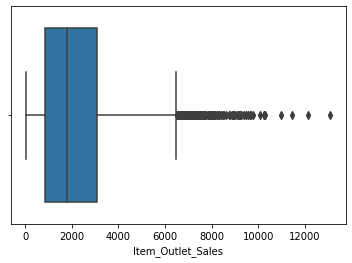

In [9]:
import seaborn as sns

ax = sns.boxplot(x=df["Item_Outlet_Sales"])

![box plot](assets/boxplot.png)

Boxplots are a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

- median (Q2/50th Percentile): the middle value of the dataset.
- first quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.
- third quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.
- interquartile range (IQR): 25th to the 75th percentile.
- whiskers (shown in blue)
- outliers (shown as green circles)
- “maximum”: Q3 + 1.5*IQR
- “minimum”: Q1 -1.5*IQR

Now after re-capping on some basic high school lessons about boxplot we can understand that our sales data contains a considerable number of outliers. Also our data seems to be skewed more towards the lower end with the median being around 2000.


In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

print(IQR, Q1, Q3)

max_outliers = Q3 + 1.5 * IQR
print('\nmax outliers:\n', max_outliers)

Item_Weight                     8.076250
Item_Visibility                 0.067606
Item_MRP                       91.834300
Outlet_Establishment_Year      17.000000
Item_Outlet_Sales            2267.381900
dtype: float64 Item_Weight                     8.773750
Item_Visibility                 0.026988
Item_MRP                       93.817950
Outlet_Establishment_Year    1987.000000
Item_Outlet_Sales             833.914500
Name: 0.25, dtype: float64 Item_Weight                    16.850000
Item_Visibility                 0.094594
Item_MRP                      185.652250
Outlet_Establishment_Year    2004.000000
Item_Outlet_Sales            3101.296400
Name: 0.75, dtype: float64

max outliers:
 Item_Weight                    28.964375
Item_Visibility                 0.196004
Item_MRP                      323.403700
Outlet_Establishment_Year    2029.500000
Item_Outlet_Sales            6502.369250
dtype: float64
keys:  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Estab

We plot the maximum outliers and now we know the specific value of the sales outliers but also the rest of the dataframe. Lets work out if we can find the number of outliers in each column.

In [54]:
import numpy as np

def replaceOutliersWithNaN(values, outlier):
    return [value if value <= outlier else np.nan for value in values ]
    
df1 = df.apply(lambda col: replaceOutliersWithNaN(col, max_outliers[col.name]) if col.name in max_outliers.keys() else col, axis=0)
beforeNaN = df.isna().sum().sum()
afterNaN = df1.isna().sum().sum()
outlier_count = afterNaN - beforeNaN
print(outlier_count)


660
